# Boston House prices dataset 

### Regresion multiple método Sequential Selector Backward


In [62]:
### Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno # To get visual representation of missing values

import math
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

import sklearn.compose 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore') # To ignore the warnings

In [63]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Import dataset from Sklearn

In [64]:
from sklearn.datasets import load_boston

In [65]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Define ours variables
Let's define out target variable and our inputs 

In [66]:
X_inputs = pd.DataFrame(boston.data, columns=boston.feature_names)

X_inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [67]:
y_target = pd.Series(boston.target, name='MEDV')

In [68]:
print(f'Shape of X_inputs: {X_inputs.shape}')
print(f'Shape of y_target: {y_target.shape}')

Shape of X_inputs: (506, 13)
Shape of y_target: (506,)


### Split data test and train

In [69]:
X, X_test, y, y_test = train_test_split(
    X_inputs,
    y_target,
    #test_size=0.25,
    random_state=1
)

In [70]:
df = pd.concat([X, y], axis=1)

In [71]:
X.shape

(379, 13)

In [72]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Fitting lineal model

In [73]:
lin_reg = LinearRegression()


### Variable selection with sequential future/backward selection

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(
    lin_reg,
    k_features=6,
    forward=False,
    cv=10,
)

sfs = sfs.fit(X, y)
sfs

SequentialFeatureSelector(cv=10, estimator=LinearRegression(), forward=False,
                          k_features=(6, 6), scoring='r2')

In [75]:
# from sklearn.feature_selection import SequentialFeatureSelector

# sfs = SequentialFeatureSelector(
#     lin_reg,
#     #k_features=6,
#     n_features_to_select=6,
#     direction='backward',
#     cv=10
# )

# sfs = sfs.fit(X, y)
# sfs

In [76]:
#print(f'Best features: {X.columns[sfs.get_support()]}')
print(f'Best features: {sfs.subsets_}')

Best features: {13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.62643795, 0.52473224, 0.81957826, 0.77156943, 0.6674731 ,
       0.75595946, 0.52406079, 0.69292566, 0.61254204, 0.7696535 ]), 'avg_score': 0.6764932429312003, 'feature_names': ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')}, 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.62489456, 0.52425459, 0.82727597, 0.77750284, 0.67234399,
       0.75643757, 0.52396634, 0.69245908, 0.61730567, 0.77510995]), 'avg_score': 0.6791550567043569, 'feature_names': ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')}, 11: {'feature_idx': (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.63448971, 0.52346959, 0.82624872, 0.77788846, 0.67816588,
       0.76294532, 0.52333962, 0.69196244, 0.61822594, 0.77369138]), 'avg_score': 0.6810427062096446, 'feature_names': ('CRIM', 'Z

In [77]:
print(f'Best score: {sfs.k_feature_names_}')
print(f'Best score: {sfs.k_score_}')

Best score: ('ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
Best score: 0.6612705577552214


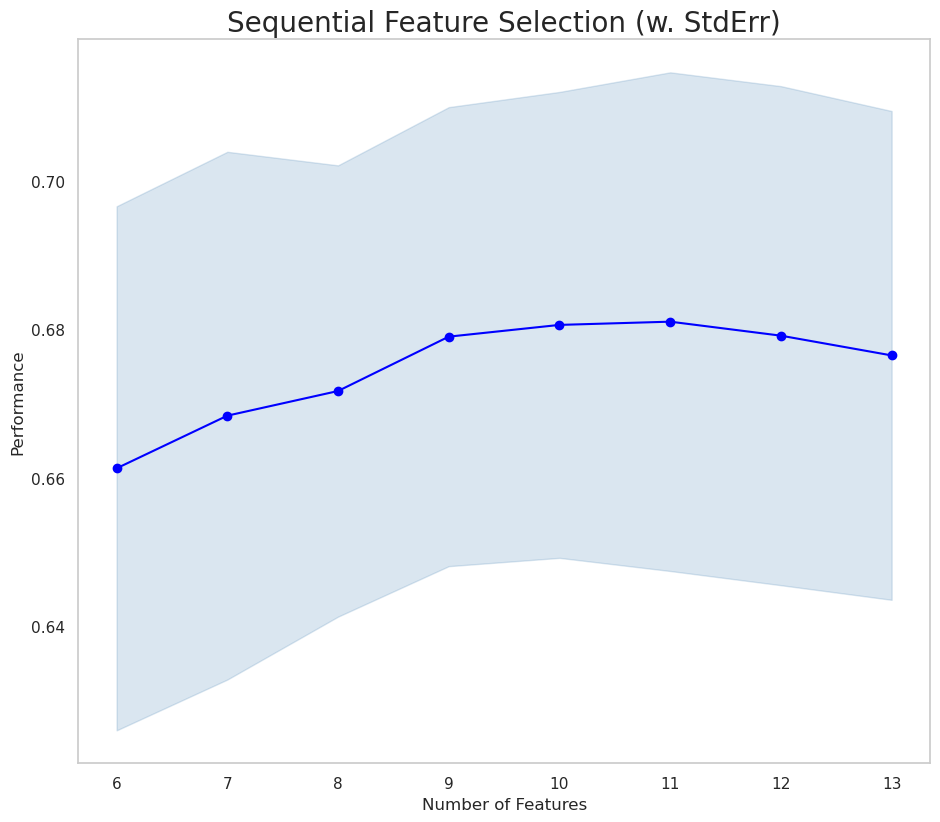

In [78]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

fig = plt_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Feature Selection (w. StdErr)', fontsize=20)
plt.grid()
plt.show()

In [79]:

X_1 = X[list(sfs.k_feature_names_)]
# X_train_sfs = sfs.transform(X)

# X_test_sfs = sfs.transform(X_test)

X_constant = sm.add_constant(X_1) 

lin_reg = sm.OLS(y, X_constant).fit()

lin_reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     138.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.06e-91
Time:                        17:49:13   Log-Likelihood:                -1144.7
No. Observations:                 379   AIC:                             2303.
Df Residuals:                     372   BIC:                             2331.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1178      5.318      8.108      0.000      32.660      53.575
ZN             0.0428      0.017      2.586      0.010       0.010       0.075
NOX          -18.6018      3.691     -5.040      0.000     -25.860     -11.344
RM             3.1579      0.491      6.430      0.000       2.192       4.124
DIS           -1.4148      0.228     -6.218      0.000      -1.862      -0.967
PTRATIO       -0.9506      0.139     -6.859      0.000      -1.223      -0.678
LSTAT         -0.5983      0.054    -10.990      0.000      -0.705      -0.491
==============================================================================
Omnibus:                      156.503   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.961
Skew:                           1.712   Prob(JB):                    2.14e-171
Kurtosis:                       9.168   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_new = sm.add_constant(X_test[list(sfs.k_feature_names_)])

y_pred = lin_reg.predict(X_new)

print('Coefficient of determinacion: ')
print(f'R^2 test model_1: {r2_score(y_test, y_pred)}')

print('\nMean Squared Error: ')
print(f'MSE test model_1: {mean_squared_error(y_test, y_pred)}')

Coefficient of determinacion: 
R^2 test model_1: 0.7499871031870426

Mean Squared Error: 
MSE test model_1: 24.765895927842074


## Model Assumptions 
### 1. Normality of residuals 


In [81]:
residuals_sm = lin_reg.resid

fitted_values = lin_reg.predict()

print(f'Mean of residuals : {residuals_sm.mean()}')

Mean of residuals : 7.367896969755129e-15


1.1. Prueba de normalidad con Q-Q plot

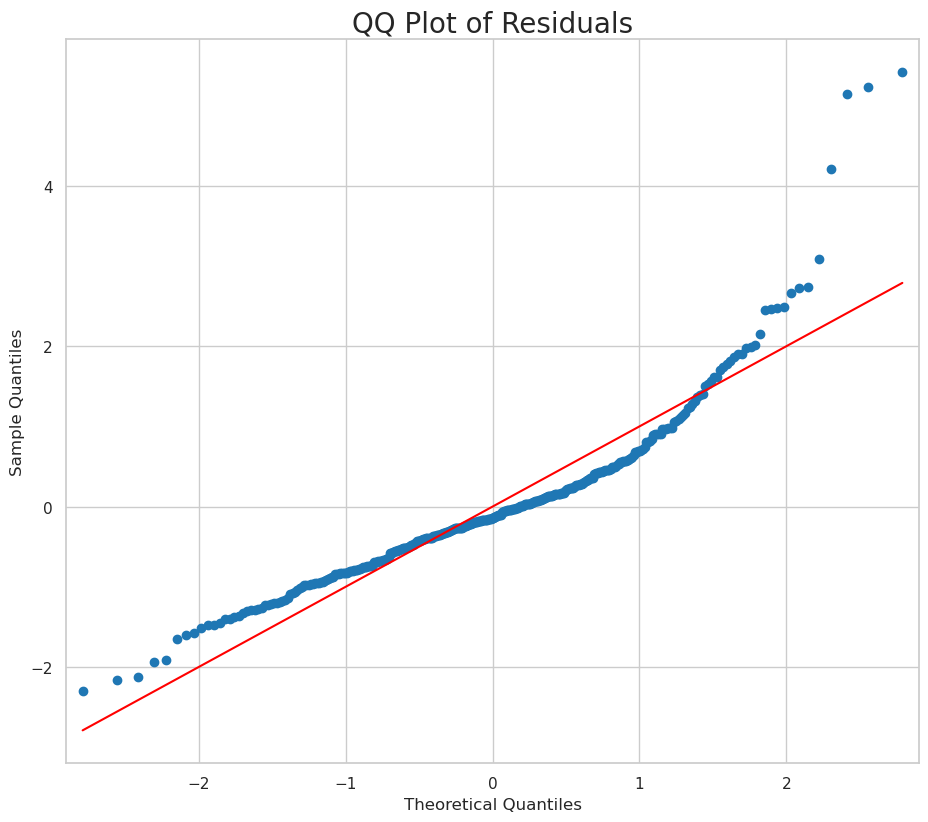

In [82]:
sm.graphics.qqplot(residuals_sm, line='s', fit=True);
plt.title('QQ Plot of Residuals', fontsize=20);

1.2 Shapiro-wilk 

In [83]:
stats.shapiro(residuals_sm)

ShapiroResult(statistic=0.8865076840441014, pvalue=3.984826349971044e-16)

**Observation**
- Con un P-value tan bajo (3.98-16) rechazamos la H0, los residuos no siguen una distribución normal.

### 2. Lineality

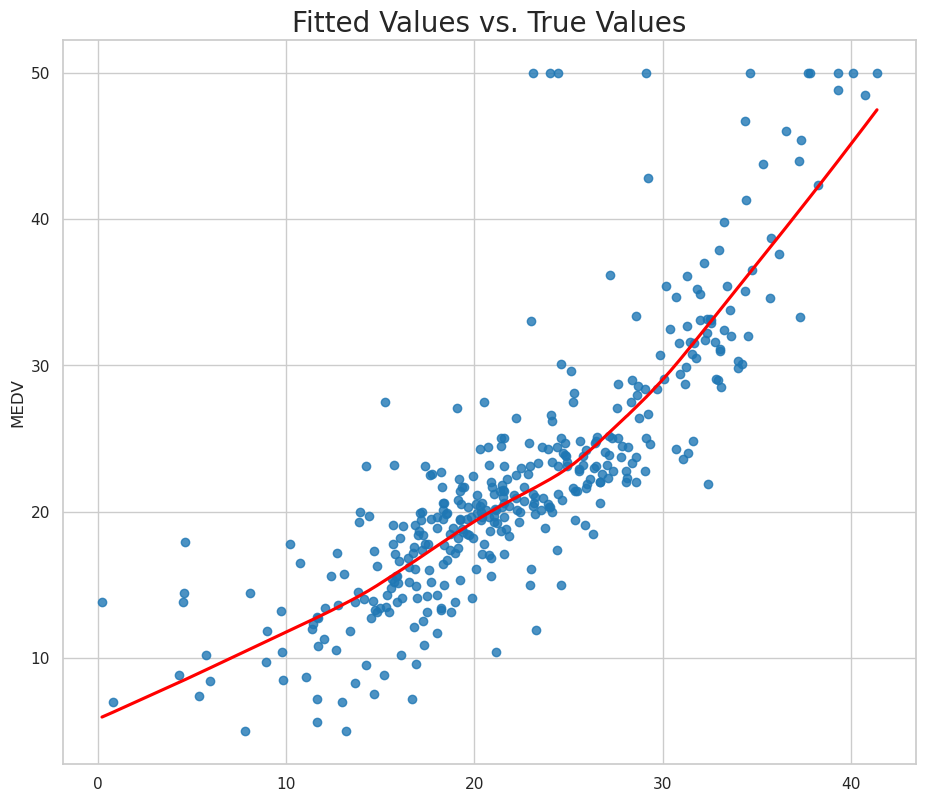

In [84]:
sns.regplot(
    data=df,
    x=fitted_values,
    y=y,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);

plt.title('Fitted Values vs. True Values', fontsize=20);

**Observation**
- No cumple con la linealidad, existen valores extremos que podrian afectar al modelo, la linealidad es el mal menor. 

### 3. Homocedasticidad 

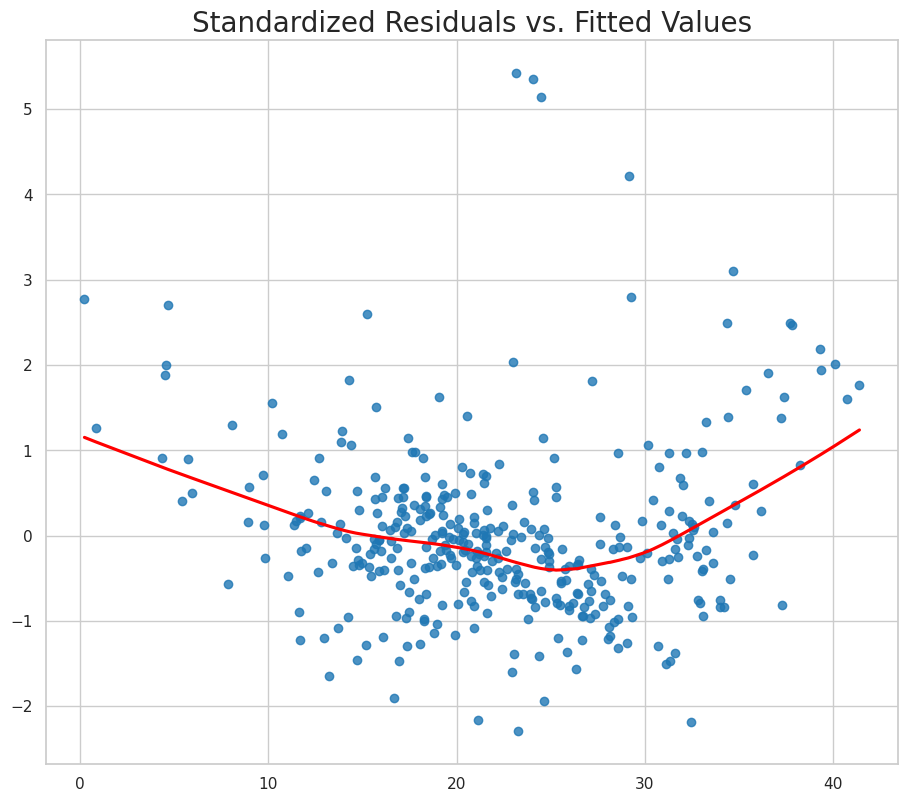

In [85]:
residuals_std = lin_reg.get_influence().resid_studentized_internal

sns.regplot(
    data=df,
    x=fitted_values,
    y=residuals_std,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Standardized Residuals vs. Fitted Values', fontsize=20);

3.2 **Breusch-Paga** Test for test equal variance (homocedasticity)

In [86]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals_sm, lin_reg.model.exog)

print(f'LM Statistic: {bp_test[0]}')
print(f'LM-Test p-value: {bp_test[1]}')

LM Statistic: 30.014773845882992
LM-Test p-value: 3.9055046561280606e-05


**Resultados**
- P-value es mayor a 0.05, por lo cual no se rechaza la hipotesis nula  lo que sugiere homoscedasticidad.

### 4. Independencia

In [87]:
print('Durbin-Watson: ', sm.stats.stattools.durbin_watson(residuals_sm))

Durbin-Watson:  1.9071407526025876


**Resultados**
- D-W es cercano a 2, lo que indica que no hay autocorrelacion de los residuos

### 5. Multicolianilidad 

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

pd.DataFrame({'vif': vif[1:]}, index=X_1.columns).T

,ZN,NOX,RM,DIS,PTRATIO,LSTAT
vif,2.283804,2.852216,1.718584,3.569957,1.328206,2.34451


**Resultados**
- No existe variables > 5

## Capitulo 2: Variable selection with recursive feature elimination RFECV

- Eliminación de variables una por una (ajustable si es deseado)
- Conjunto de variables que ofrecen mejor desempeño (High performance) con funcion scoring
- Posiblemente se puede usar con diferentes modelos llamados estimadores (Regresion lineal, arboloes de decisiones, Random Forest, etc)
- Número mínimo de variables a considerar
- Se utiliza el conjunto completo y se elimina paso a paso las variables mediante features importance y calcula funcion score, asi en cada paso para eliminar finalmente las variables menos importantes. 

In [89]:
from sklearn.feature_selection import RFECV

lin_reg = LinearRegression()

rfecv = RFECV(
    lin_reg, # modelo a ajustar (en este caso Regresion lineal)
    step = 1, # como? eliminando variables una a una
    min_features_to_select=3, # minimo de variables a seleccionar
    cv = 4, # cross validation, hacer lo mismo 4 veces
    verbose = 1 # imprimir resultados
)

rfecv = rfecv.fit(X, y)

# se ve grupos de 4, porque se hizo cross validation con 4 grupos


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting 

In [90]:
print(f'\n Best number of features: {rfecv.n_features_}')
print(f'\n Ranks of features: {rfecv.ranking_}')
print(f'\n Score of features: {rfecv.grid_scores_}')
print(f'\n Selected features: {X.columns[rfecv.support_]}')


 Best number of features: 11

 Ranks of features: [1 1 1 1 1 1 2 1 1 1 1 3 1]

 Score of features: [[0.27187991 0.64841088 0.45399358 0.55581144]
 [0.36932821 0.70701746 0.49319703 0.64112398]
 [0.40080597 0.72173144 0.48985759 0.66052826]
 [0.56332077 0.74284633 0.6331105  0.71664724]
 [0.57215473 0.72734142 0.64000202 0.71874847]
 [0.59380826 0.74544127 0.64040765 0.72586095]
 [0.58761741 0.75452526 0.64866322 0.73002181]
 [0.59109738 0.74589247 0.64743406 0.73356338]
 [0.59457383 0.74534496 0.65710113 0.73590207]
 [0.5750184  0.75094591 0.66068214 0.73572939]
 [0.57546233 0.75783463 0.65920278 0.73515216]]

 Selected features: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')


Variables que deberiamos utilizar, no debemos utilizar el valor 7 o sea AGE ni B(11)

In [91]:
rfecv.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [92]:
print(X.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


Remplazamos los resultados en input (X)

In [93]:
resp = X.columns[rfecv.get_support()] # selecciona las variables que se quedan 11 de 13
resp

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [94]:
X[resp].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,2.5961,5.0,296.0,16.6,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,5.4007,4.0,281.0,19.0,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,5.1004,3.0,233.0,17.9,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,3.5325,4.0,304.0,18.4,10.36


Transformamos los inputs

In [95]:
rfecv.transform(X)

array([[4.52700e-02, 0.00000e+00, 1.19300e+01, ..., 2.73000e+02,
        2.10000e+01, 9.08000e+00],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 2.96000e+02,
        1.66000e+01, 1.46900e+01],
       [4.11300e-02, 2.50000e+01, 4.86000e+00, ..., 2.81000e+02,
        1.90000e+01, 5.29000e+00],
       ...,
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 1.93700e+01],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, ..., 3.07000e+02,
        1.74000e+01, 1.08800e+01],
       [8.01400e-02, 0.00000e+00, 5.96000e+00, ..., 2.79000e+02,
        1.92000e+01, 8.77000e+00]])

### Ajustamos el modelo

In [96]:
X_2 = X[resp]
#X_2 = rfecv.transform(X)
X_constant = sm.add_constant(X_2)

lin_reg_2 = sm.OLS(y, X_constant).fit()

lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     83.15
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.52e-92
Time:                        17:49:15   Log-Likelihood:                -1129.7
No. Observations:                 379   AIC:                             2283.
Df Residuals:                     367   BIC:                             2331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3335      5.765      8.384      0.000      36.997      59.670
CRIM          -0.1219      0.035     -3.500      0.001      -0.190      -0.053
ZN             0.0562      0.017      3.291      0.001       0.023       0.090
INDUS          0.0332      0.071      0.466      0.641      -0.107       0.173
CHAS           2.5412      0.941      2.701      0.007       0.691       4.391
NOX          -21.4005      4.319     -4.955      0.000     -29.893     -12.908
RM             2.8463      0.487      5.842      0.000       1.888       3.804
DIS           -1.5250      0.229     -6.654      0.000      -1.976      -1.074
RAD            0.2890      0.081      3.566      0.000       0.130       0.448
TAX           -0.0107      0.005     -2.309      0.021      -0.020      -0.002
PTRATIO       -0.9736      0.158     -6.155      0.000      -1.285      -0.663
LSTAT         -0.5633      0.054    -10.347      0.000      -0.670      -0.456
==============================================================================
Omnibus:                      150.348   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.948
Skew:                           1.675   Prob(JB):                    1.36e-148
Kurtosis:                       8.648   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations**
- R-squared 0.71,ligeramente mayor al anterior modelo.
- AIC,BIC es menor al anterior modelo, lo que sugiere que este modelo es mejor.
- Indus no es significativa, se tendra que probar en los supuestos

### Eliminamos la variabe INDUS

In [97]:
X_3 = X[resp].drop(['INDUS'], axis=1)

X_constant = sm.add_constant(X_3)

lin_reg_3 = sm.OLS(y, X_constant).fit()

lin_reg_3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     91.64
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.72e-93
Time:                        17:49:15   Log-Likelihood:                -1129.8
No. Observations:                 379   AIC:                             2282.
Df Residuals:                     368   BIC:                             2325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0798      5.733      8.386      0.000      36.806      59.353
CRIM          -0.1224      0.035     -3.519      0.000      -0.191      -0.054
ZN             0.0553      0.017      3.262      0.001       0.022       0.089
CHAS           2.5653      0.938      2.734      0.007       0.720       4.410
NOX          -20.8026      4.119     -5.050      0.000     -28.903     -12.702
RM             2.8318      0.486      5.831      0.000       1.877       3.787
DIS           -1.5456      0.225     -6.880      0.000      -1.987      -1.104
RAD            0.2786      0.078      3.580      0.000       0.126       0.432
TAX           -0.0098      0.004     -2.321      0.021      -0.018      -0.002
PTRATIO       -0.9634      0.156     -6.157      0.000      -1.271      -0.656
LSTAT         -0.5610      0.054    -10.358      0.000      -0.668      -0.454
==============================================================================
Omnibus:                      150.873   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.454
Skew:                           1.680   Prob(JB):                    8.68e-150
Kurtosis:                       8.673   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**
- R-squared esta ligeramente mejor, 
- AIC y BIC tambien, casi no hay cambios
- Todas las variables son significativas, mejoró el modelo porque se usa menos variables, ahora se tienen que hacer los supuestos

Grafico de funcion de eliminacion recursiva

Text(0, 0.5, 'Score')

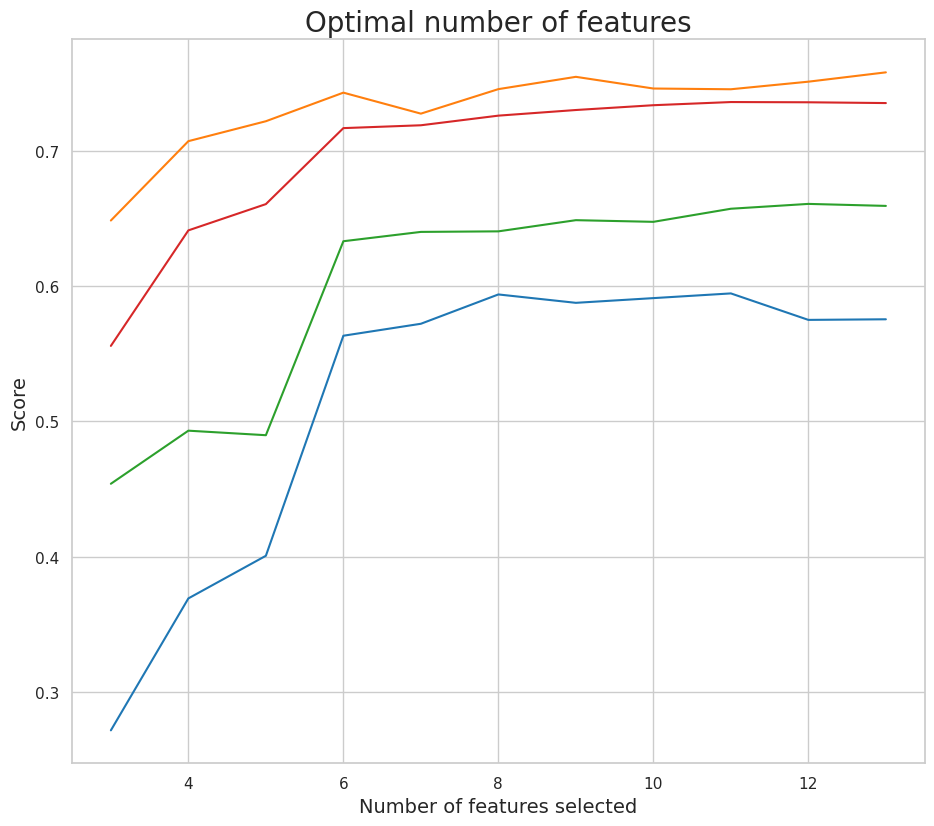

In [98]:
min_features_to_select = 3 

plt.plot(
    range(
        min_features_to_select,
        len(rfecv.grid_scores_) + min_features_to_select
    ),
    rfecv.grid_scores_
)

plt.title('Optimal number of features', fontsize=20)
plt.xlabel('Number of features selected', fontsize=14)
plt.ylabel('Score (r^2)', fontsize=14)

### Performance and comparison

In [103]:
X_new = sm.add_constant(X_test[resp])


pred_test_2 = lin_reg_2.predict(X_new)

print('Coefficient of determinacion: ')
print(f'R^2 test model_2: {r2_score(y_test, pred_test_2)}')

print('\nMean Squared Error: ')
print(f'MSE test model_2: {mean_squared_error(y_test, pred_test_2)}')


Coefficient of determinacion: 
R^2 test model_2: 0.7672053297054302

Mean Squared Error: 
MSE test model_2: 23.060284691572868


In [104]:
X_new = sm.add_constant(X_test[resp].drop(['INDUS'], axis=1))

pred_test_3 = lin_reg_3.predict(X_new)

print('Coefficient of determinacion: ')
print(f'R^2 test model_3: {r2_score(y_test, pred_test_3)}')

print('\nMean Squared Error: ')
print(f'MSE test model_3: {mean_squared_error(y_test, pred_test_3)}')

Coefficient of determinacion: 
R^2 test model_3: 0.767819898244372

Mean Squared Error: 
MSE test model_3: 22.99940647020916
